In [2]:
"""
jupyter-nbconvert report_plots.ipynb --to python; python -u report_plots.py

"""

'\njupyter-nbconvert report_plots.ipynb --to python; python -u report_plots.py\n\n'

In [3]:
from __future__ import division
import os
import glob
import pickle
from natsort import natsorted
import argparse
import os
import sys
import numpy as np
import tqdm
import pandas as pd

import scipy as sp
import numpy as np
from pprint import pprint
import glob
import sys
sys.path.append('../')
from plume_env import PlumeEnvironment, PlumeFrameStackEnvironment
import config
import agents
import agent_analysis
import os
import sklearn
import sklearn.decomposition as skld


import sim_analysis

import importlib
import log_analysis
importlib.reload(log_analysis)

import config
np.random.seed(config.seed_global)

In [4]:
import sys
batchmode = False
if 'ipykernel_launcher' in sys.argv[0]:
    print("Interactive mode")
else:
    batchmode = True
    print("Batch/CLI mode")
    import argparse

Interactive mode


In [5]:
# Common
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.patches as mpatches



from IPython.display import clear_output
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set(style="white")
# print(plt.style.available)

mpl.rcParams['figure.dpi'] = 100
dpi_save = 300
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

# Interactive vs. CLI
if not batchmode:
    %matplotlib inline
    # %config InlineBackend.figure_format = 'svg'
    %config InlineBackend.figure_format = 'retina'
if batchmode:
    matplotlib.use("Agg")
    
pca3d_figsize=(10,5)

In [6]:
# Common
outcome_colormap = {'HOME': 'green', 
                     'OOB':'red', 
                     'OOT':'blue'
                    }

outcome_colormap = {'HOME': 'skyblue', 
                     'OOB':'orange', 
                     'OOT':'blue'
                    }

regime_colormap = {'SEARCH': 'red', 
                    'TRACK':'green', 
                    'RECOVER':'blue', 
                    'WARMUP':'cyan'
                   }

importlib.reload(config)
outcome_colormap = config.outcome_colormap
regime_colormap = config.regime_colormap



# https://seaborn.pydata.org/generated/seaborn.set_color_codes.html#seaborn.set_color_codes
sns.color_palette()
sns.set_color_codes(palette='deep')

In [14]:
if batchmode:
    parser = argparse.ArgumentParser(description='')
    parser.add_argument('--expt_dir', 
                default='/home/satsingh/plume/plumezoo/latest/fly/memory/')
    args = parser.parse_args()
    print(args)
    
    expt_dir = args.expt_dir
else:
    expt_dir = "/Users/aaravsinha/manyplume/oneplume/ppo/trained_models/Walking20250807/plume_Walk-v17_20250807_VRNN_constantx5b5noisy3x5b5_stepoob_bx2.72_t100000010000_q0.40.5_dmx0.80.8_dmn0.70.4_h64_wd0.00012_n1_walking_seed30970f1/"



outdir = f'{expt_dir}/report_common_subspace/'
os.makedirs(outdir, exist_ok=True)

In [16]:
models = '/Users/aaravsinha/manyplume/oneplume/ppo/trained_models/Walking20250807/plume_Walk-v17_20250807_VRNN_constantx5b5noisy3x5b5_stepoob_bx2.72_t100000010000_q0.40.5_dmx0.80.8_dmn0.70.4_h64_wd0.00012_n1_walking_seed30970f1.pt'
assert len(models) > 0

In [17]:
use_datasets = ['constantx5b5']
selected_df_all = []

for model_fname in models:
    # Fix the model_dir path to avoid duplication
    model_dir = os.path.dirname(model_fname) + '/'
    print("model_dir", model_dir)
    model_seed = model_dir.split('seed')[-1].split('/')[0]

#     outdir = f"{model_dir}/report_common_subspace/"
#     os.makedirs(outdir, exist_ok=True)
#     print(outdir)

#     is_recurrent = True if ('GRU' in model_dir) or ('VRNN' in model_dir) else False

#     logfiles = natsorted(glob.glob(model_dir + '*.pkl'))
#     [ x.split('/')[-1] for x in logfiles ]

selected_df = log_analysis.get_selected_df(
                              n_episodes_home=60, 
                              n_episodes_other=60,
                              min_ep_steps=0)
selected_df['model_seed'] = model_seed
print(model_seed, selected_df.shape)
selected_df_all.append( selected_df )



model_dir //
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir //
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir //
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir //
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir //
model_dir /
model_dir /
model_dir /
model_dir //
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir //
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir //
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_dir /
model_di

In [18]:
selected_df_all = pd.concat(selected_df_all)
selected_df_all.shape

(98, 6)

In [19]:
selected_df_all.groupby(['model_seed', 'dataset', 'outcome']).count()

idx  ep_length  log
model_seed dataset      outcome                     
           constantx5b5 HOME      49         49   49
                        OOB       49         49   49

## Figure 1

In [20]:
# Find some good examples from the actual data
print("Available model seeds:", selected_df_all['model_seed'].unique())
print("Available datasets:", selected_df_all['dataset'].unique())
print("Data shape:", selected_df_all.shape)

# Get a sample of successful episodes from the actual data
sample_home = selected_df_all.query("outcome == 'HOME' and dataset == 'constantx5b5'").sample(min(3, len(selected_df_all.query("outcome == 'HOME'"))))
print("\nSample HOME episodes:")
print(sample_home[['dataset', 'model_seed', 'idx', 'outcome']])

# Use a different eval run (model_seed) and pick a HOME with different behavior
seeds = selected_df_all['model_seed'].unique().tolist()
print("\nAvailable model seeds:", seeds)
if len(seeds) > 1:
    alt_seed = seeds[1]
else:
    alt_seed = seeds[0]  # fallback if only one seed

def pick_diverse_home_episode(sub_df):
    candidates = []
    for _, r in sub_df.iterrows():
        log = r['log']
        traj = log_analysis.get_traj_df(
            log,
            extended_metadata=False,
            squash_action=True,
            seed=r['model_seed']
        )
        # Behavior metrics
        t_steps = len(traj)
        dxy = np.hypot(traj['loc_x'].diff(), traj['loc_y'].diff()).fillna(0.0)
        path_len = dxy.sum()
        net_disp = np.hypot(traj['loc_x'].iloc[-1] - traj['loc_x'].iloc[0],
                            traj['loc_y'].iloc[-1] - traj['loc_y'].iloc[0])
        tortuosity = path_len / (net_disp + 1e-6)
        track_frac = (traj['regime'] == 'TRACK').mean() if 'regime' in traj.columns else np.nan
        candidates.append(dict(idx=int(r['idx']),
                               model_seed=r['model_seed'],
                               dataset=r['dataset'],
                               t_steps=int(t_steps),
                               path_len=float(path_len),
                               net_disp=float(net_disp),
                               tortuosity=float(tortuosity),
                               track_frac=float(track_frac) if pd.notna(track_frac) else np.nan))
    cand_df = pd.DataFrame(candidates)
    print("\nCandidate HOME metrics (alt seed):")
    print(cand_df.sort_values('tortuosity', ascending=False).head(5))
    # Prefer high tortuosity, then longer episodes
    chosen = cand_df.sort_values(['tortuosity', 't_steps'], ascending=[False, False]).iloc[0]
    return chosen

home_alt = selected_df_all.query("outcome == 'HOME' and dataset == 'constantx5b5' and model_seed == @alt_seed")
assert len(home_alt) > 0, "No HOME episodes found for alternate seed."

chosen = pick_diverse_home_episode(home_alt)

ep_selected = pd.DataFrame([{
    'dataset': chosen['dataset'],
    'model_seed': chosen['model_seed'],
    'idx': chosen['idx'],
    'birthx': 1.0,
    'zoom': 1
}])

print("\nSelected different HOME episode:")
print(ep_selected)


Available model seeds: ['']
Available datasets: ['constantx5b5']
Data shape: (98, 6)

Sample HOME episodes:
         dataset model_seed  idx outcome
27  constantx5b5              56    HOME
45  constantx5b5              77    HOME
4   constantx5b5              60    HOME

Available model seeds: ['']

Candidate HOME metrics (alt seed):
    idx model_seed       dataset  t_steps  path_len  net_disp  tortuosity  \
1     0             constantx5b5      238  0.341313  0.185896    1.836031   
31   59             constantx5b5      124  0.142227  0.094263    1.508816   
0     5             constantx5b5      347  0.422470  0.291985    1.446884   
36   79             constantx5b5      117  0.208360  0.149549    1.393251   
47   17             constantx5b5       67  0.114873  0.084563    1.358409   

    track_frac  
1     0.466387  
31    0.532258  
0     0.463977  
36    0.897436  
47    0.820896  

Selected different HOME episode:
        dataset model_seed  idx  birthx  zoom
0  constantx5b5   

In [21]:
# Return sequence of concentrations while walking y-axis along passed x_val 
def walk_y(data_at_t, x_val, y_vals=[0.0]):
    q1 = str(x_val) + ' > x_minus_radius and ' + str(x_val) + ' < x_plus_radius'
    data_t_x = data_at_t.query(q1)     
    concentrations = []
    for y_val in y_vals:
        q2 = str(y_val) + ' > y_minus_radius and ' + str(y_val) + ' < y_plus_radius'
        c = data_t_x.query(q2).concentration.sum()
        concentrations.append(c)
    return concentrations

# Return sequence of concentrations while walking x-axis along passed y_val 
def walk_x(data_at_t, y_val, x_vals=[0., 1., 2., 3., 4., 5.]):
    q1 = str(y_val) + ' > y_minus_radius and ' + str(y_val) + ' < y_plus_radius'
    data_t_y = data_at_t.query(q1)     
    concentrations = []
    for x_val in x_vals:
        q2 = str(x_val) + ' > x_minus_radius and ' + str(x_val) + ' < x_plus_radius'
        c = data_t_y.query(q2).concentration.sum()
        concentrations.append(c)
    return concentrations

constantx5b5


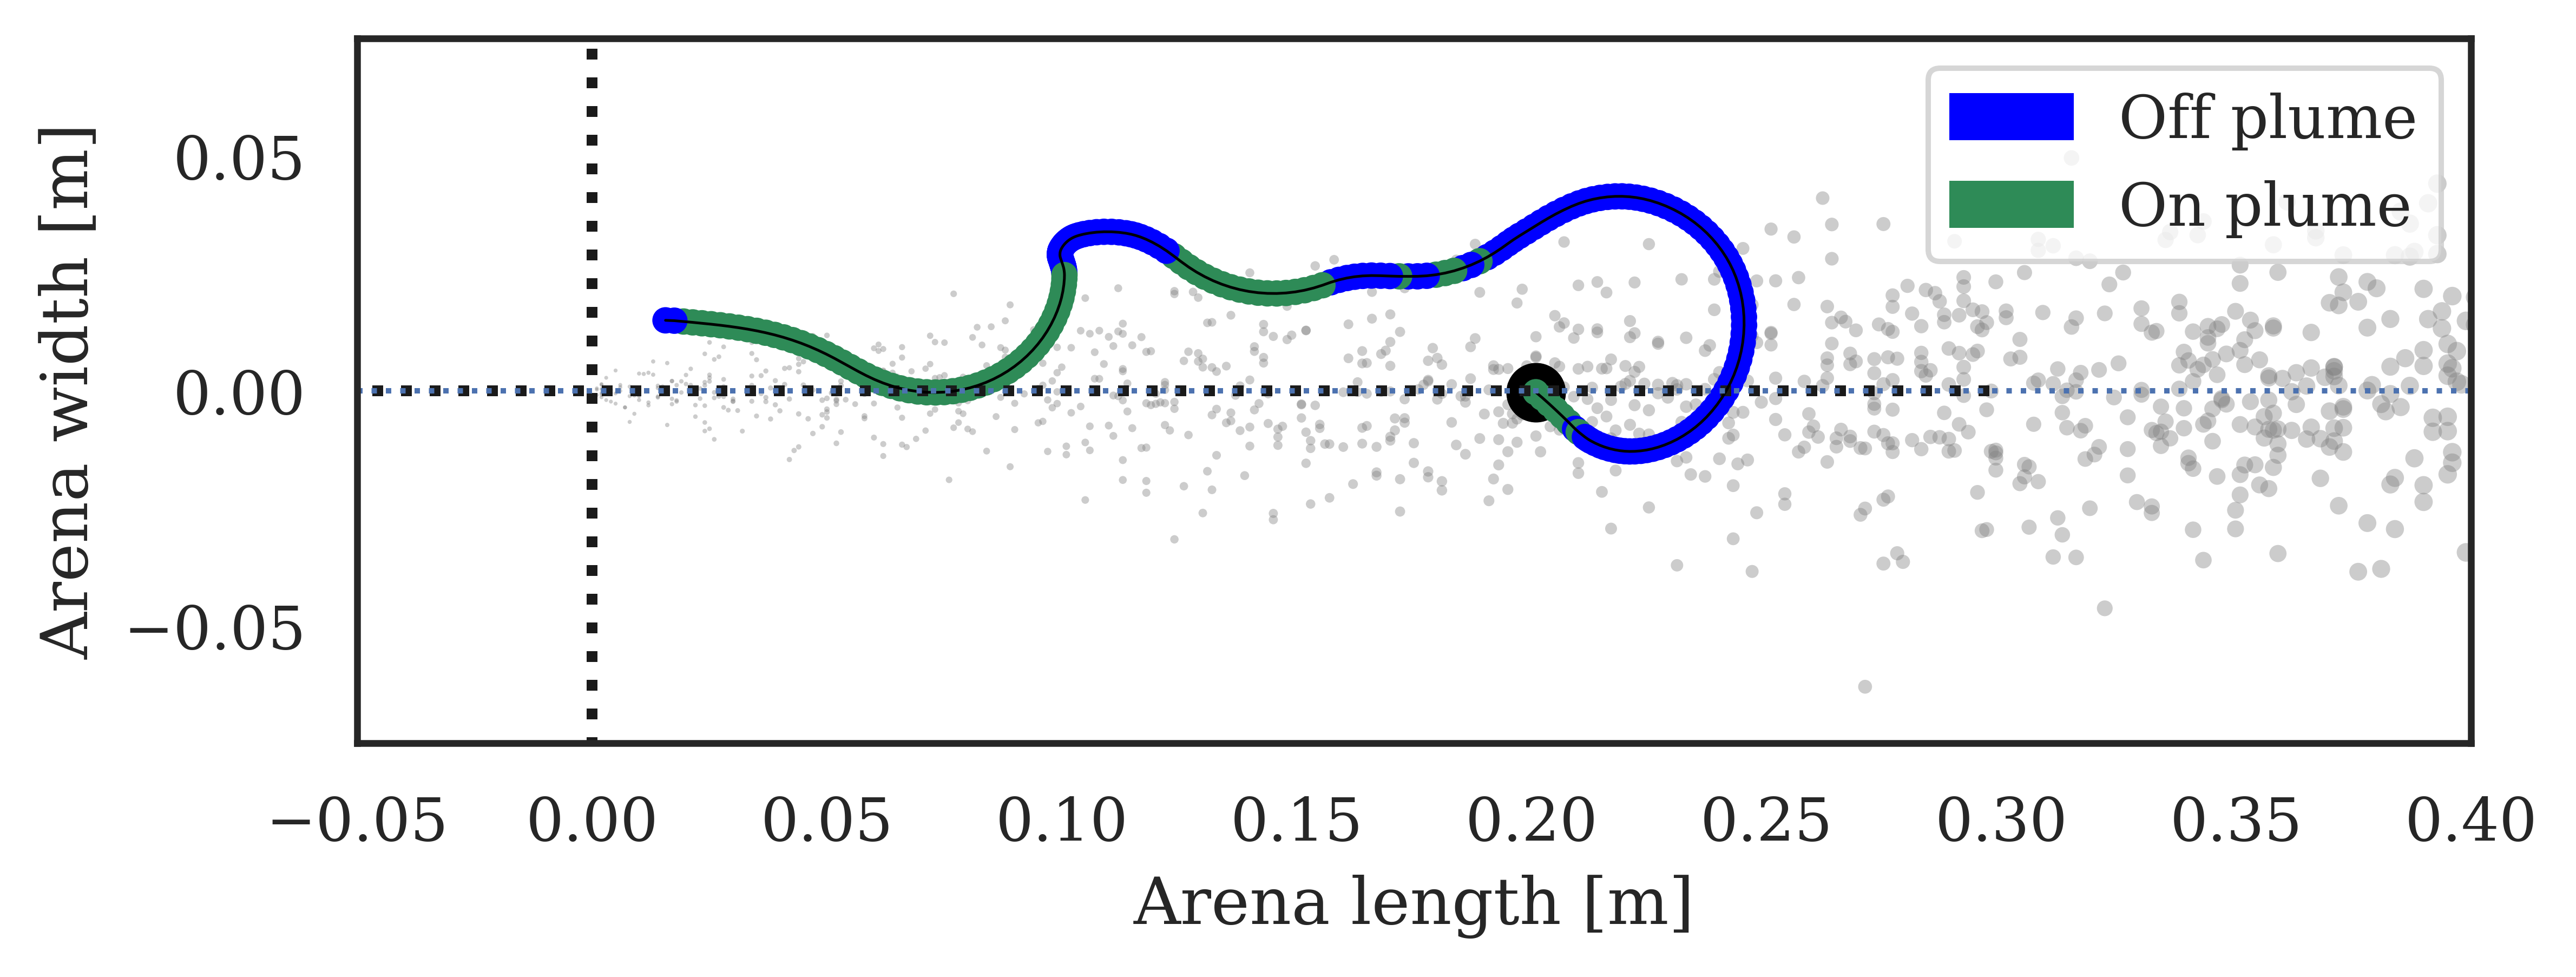

constantx5b5


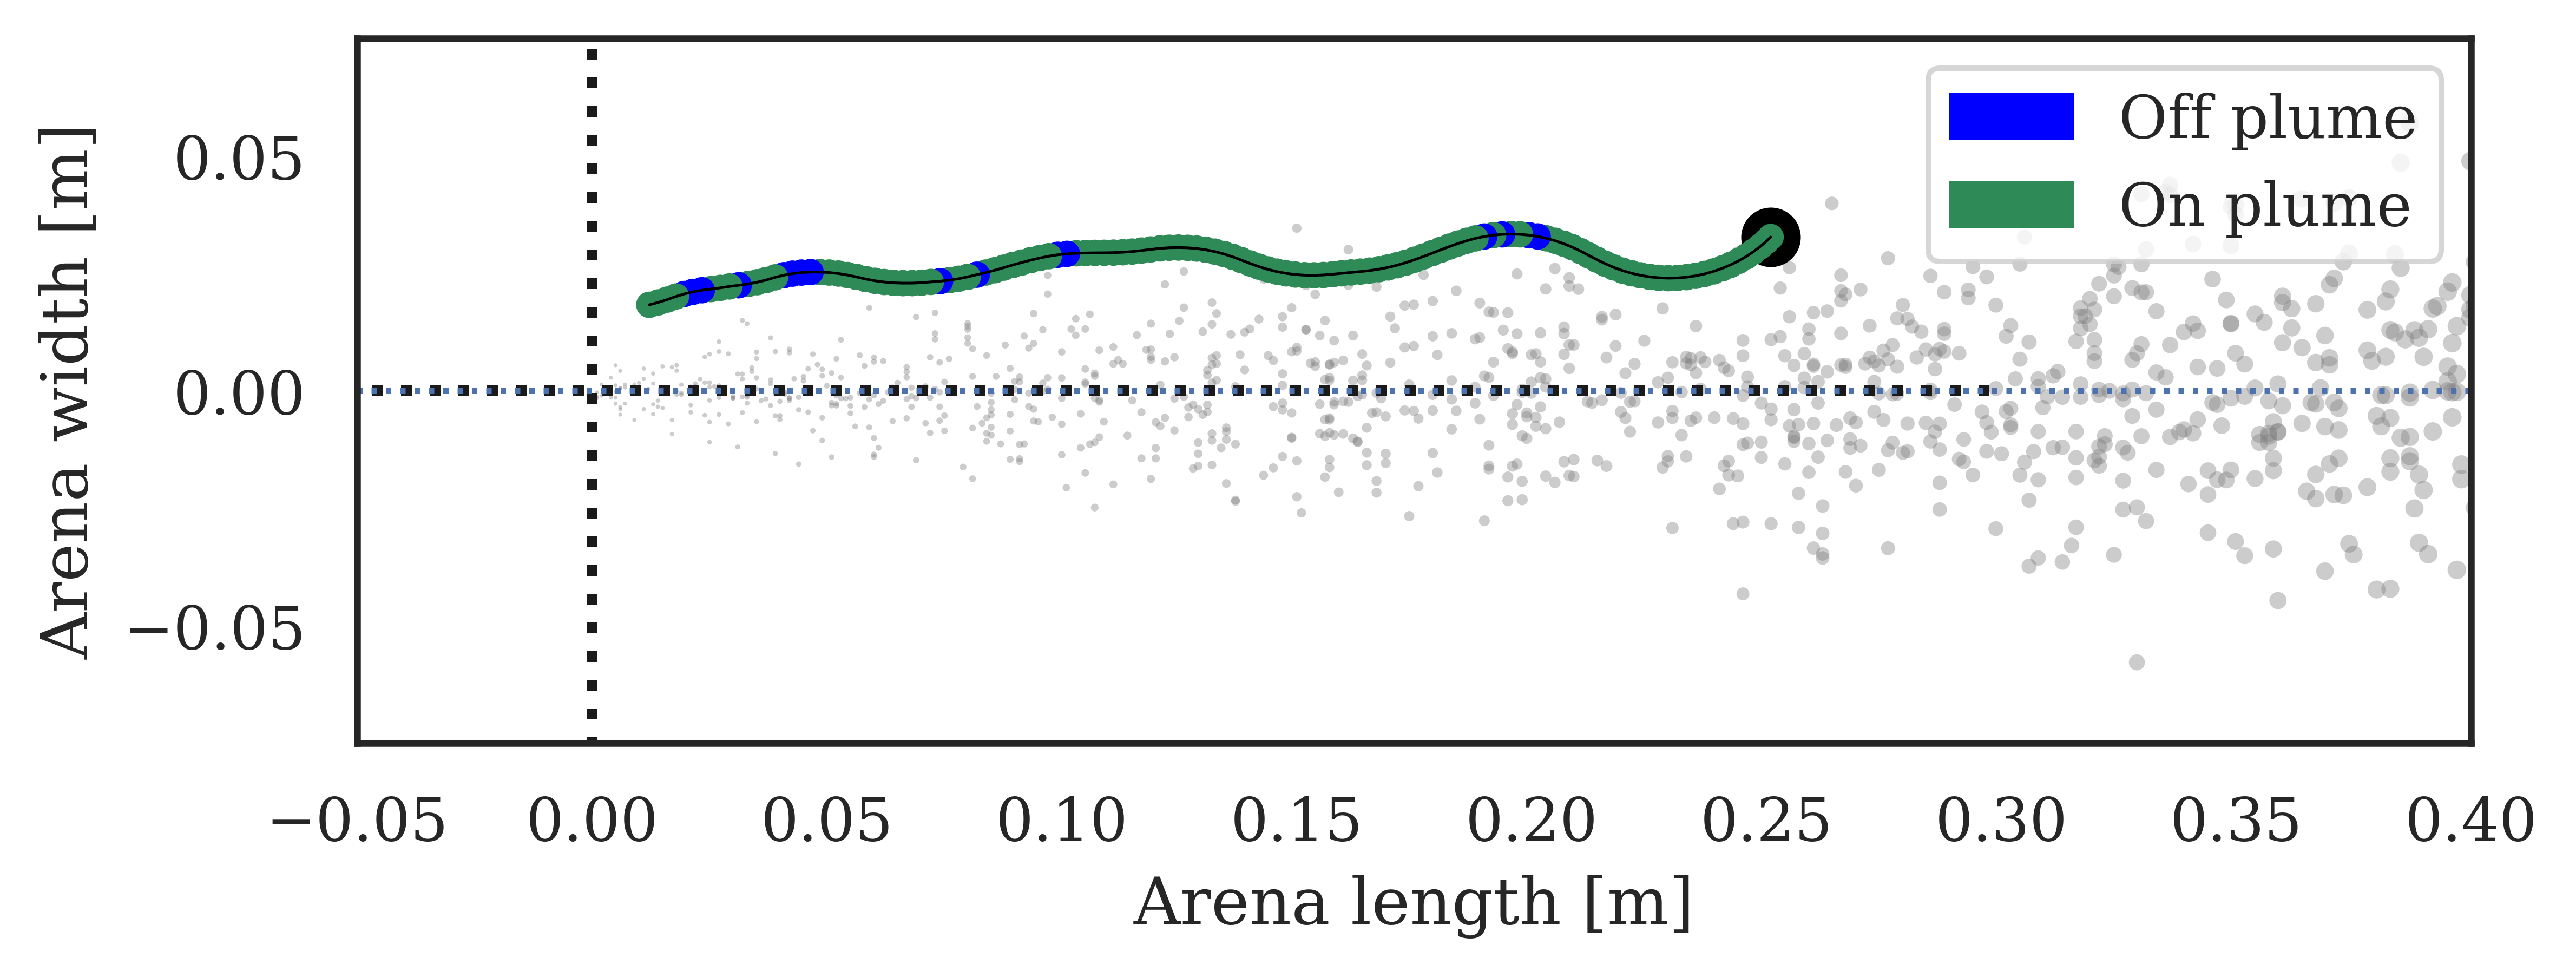

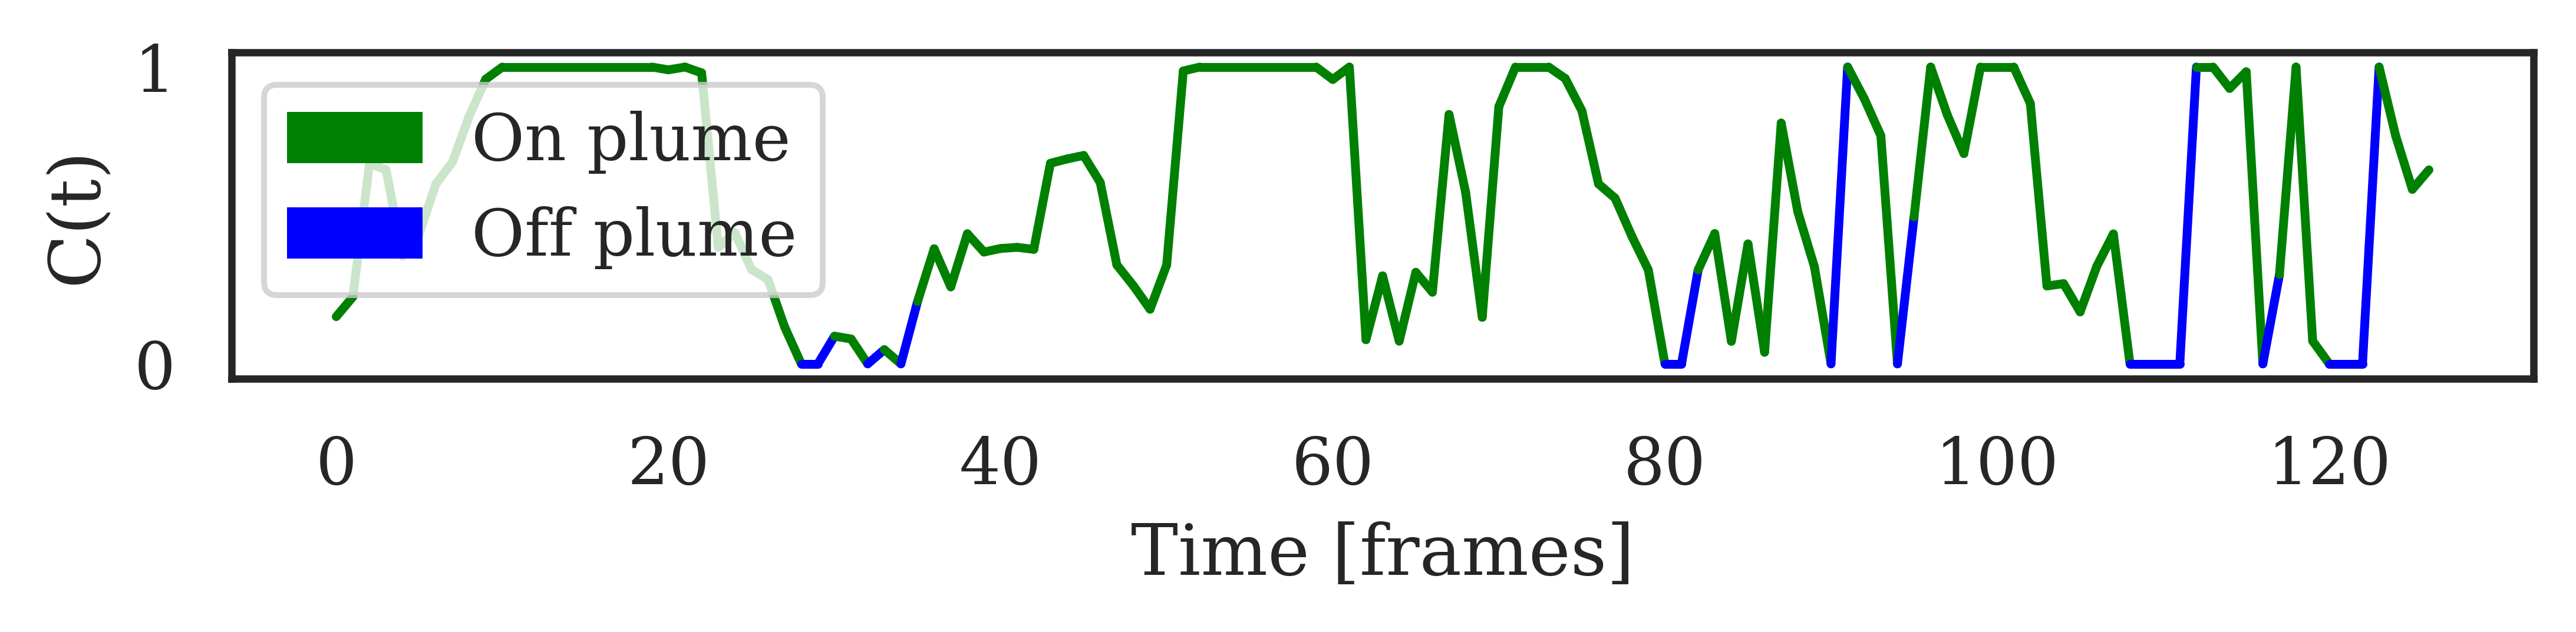

constantx5b5
Applying diffusion_multiplier 0.33
ylims [-0.7027587890625, 0.666748046875]


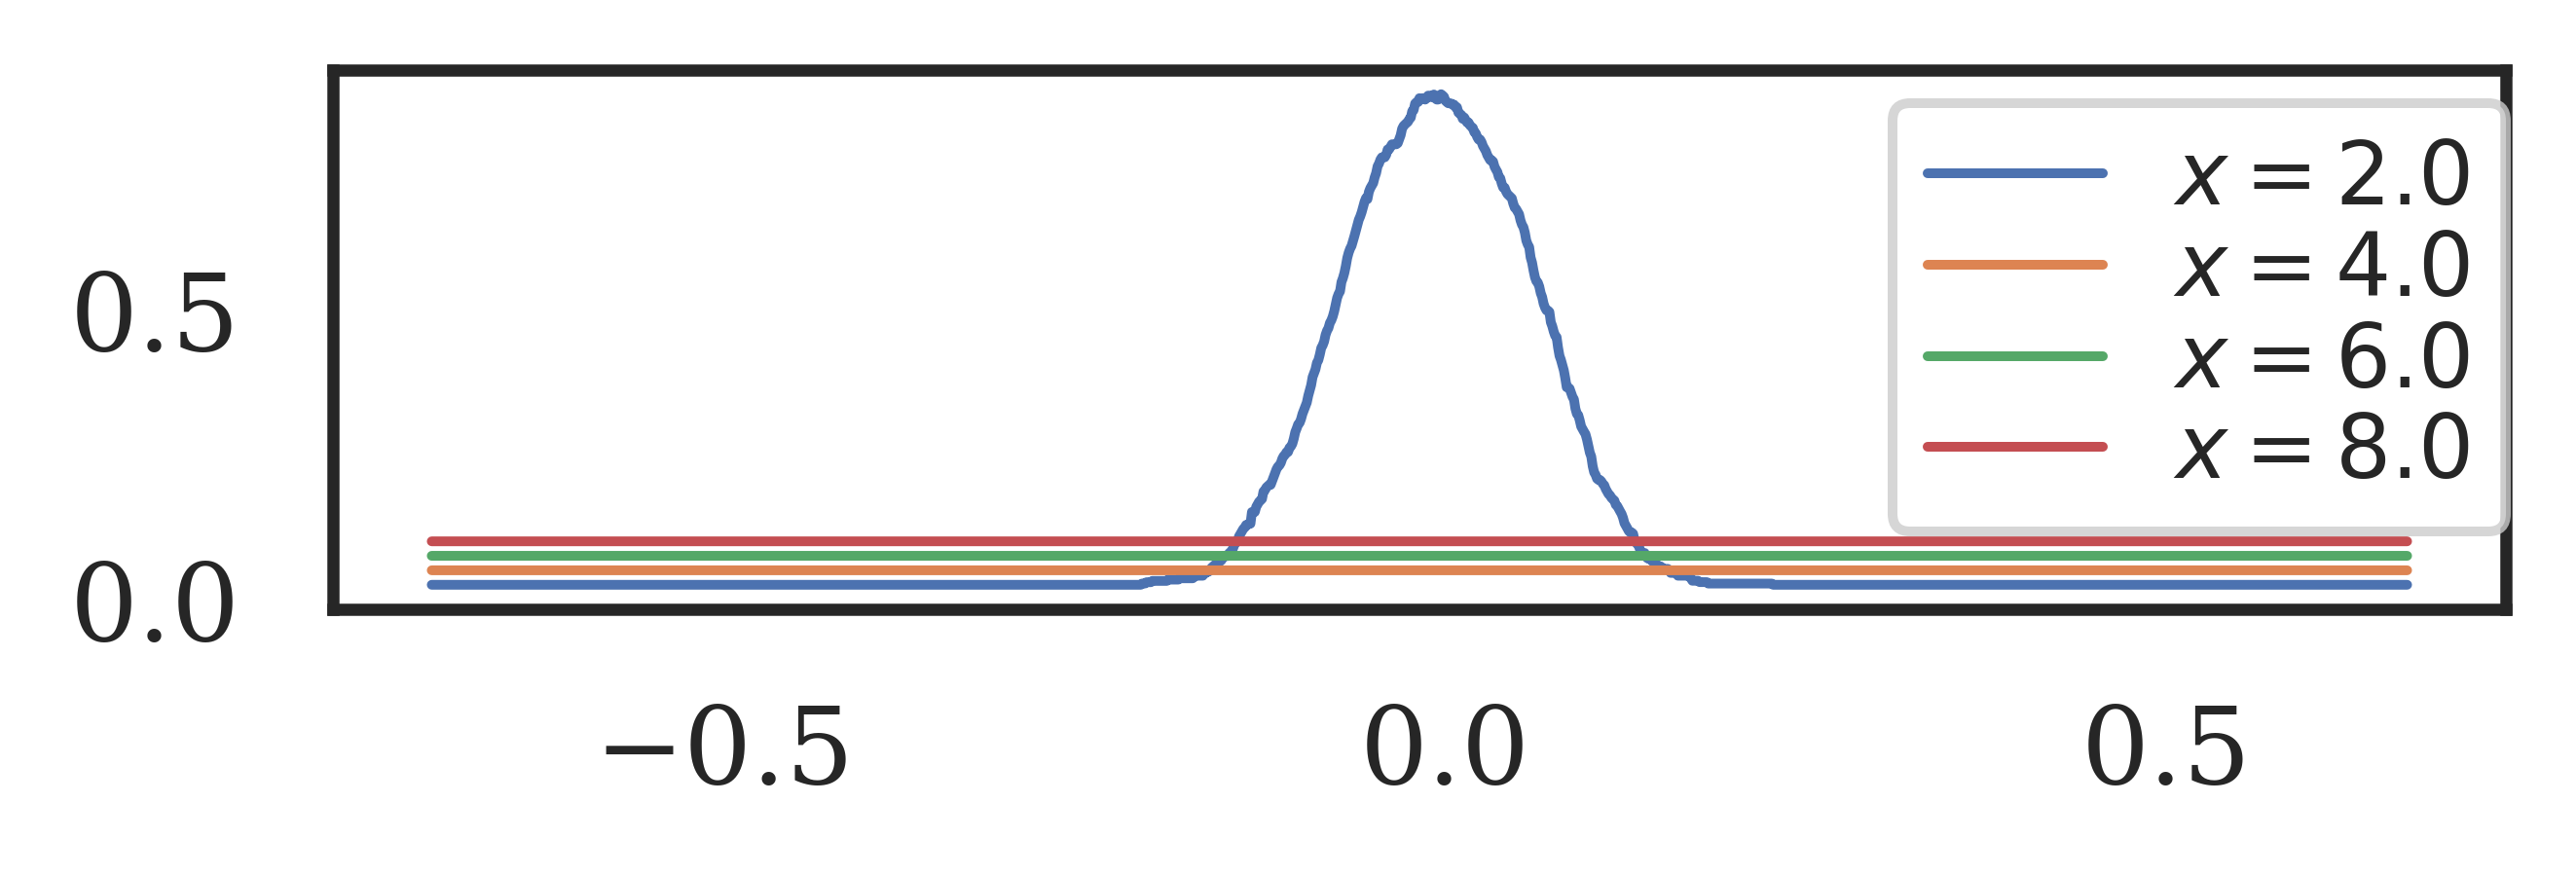

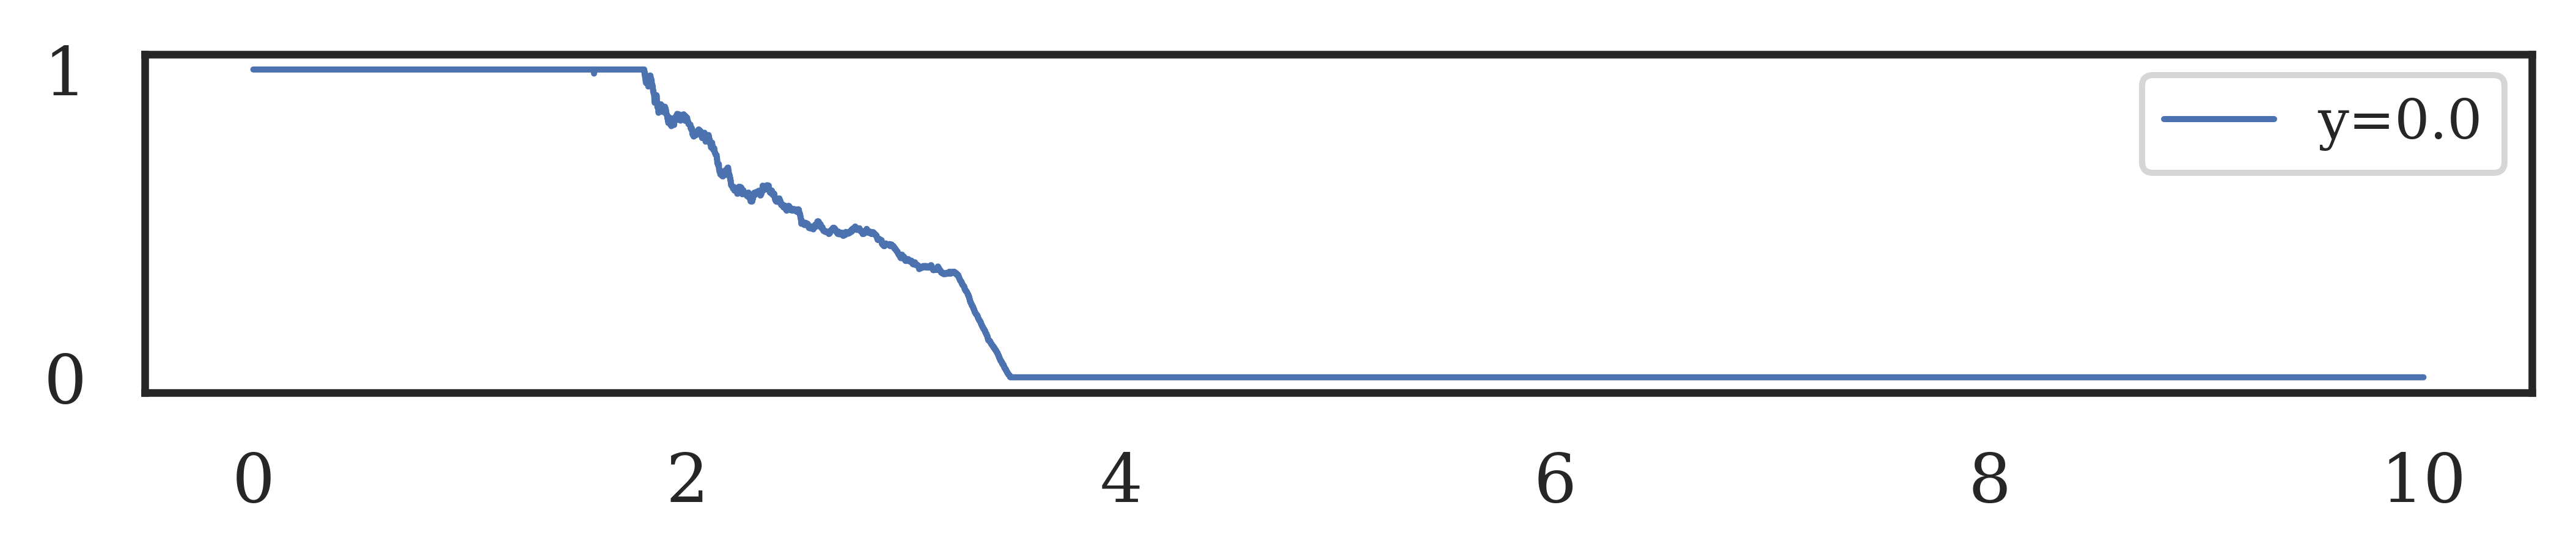

constantx5b5
Applying diffusion_multiplier 0.33
ylims [-0.7027587890625, 0.666748046875]


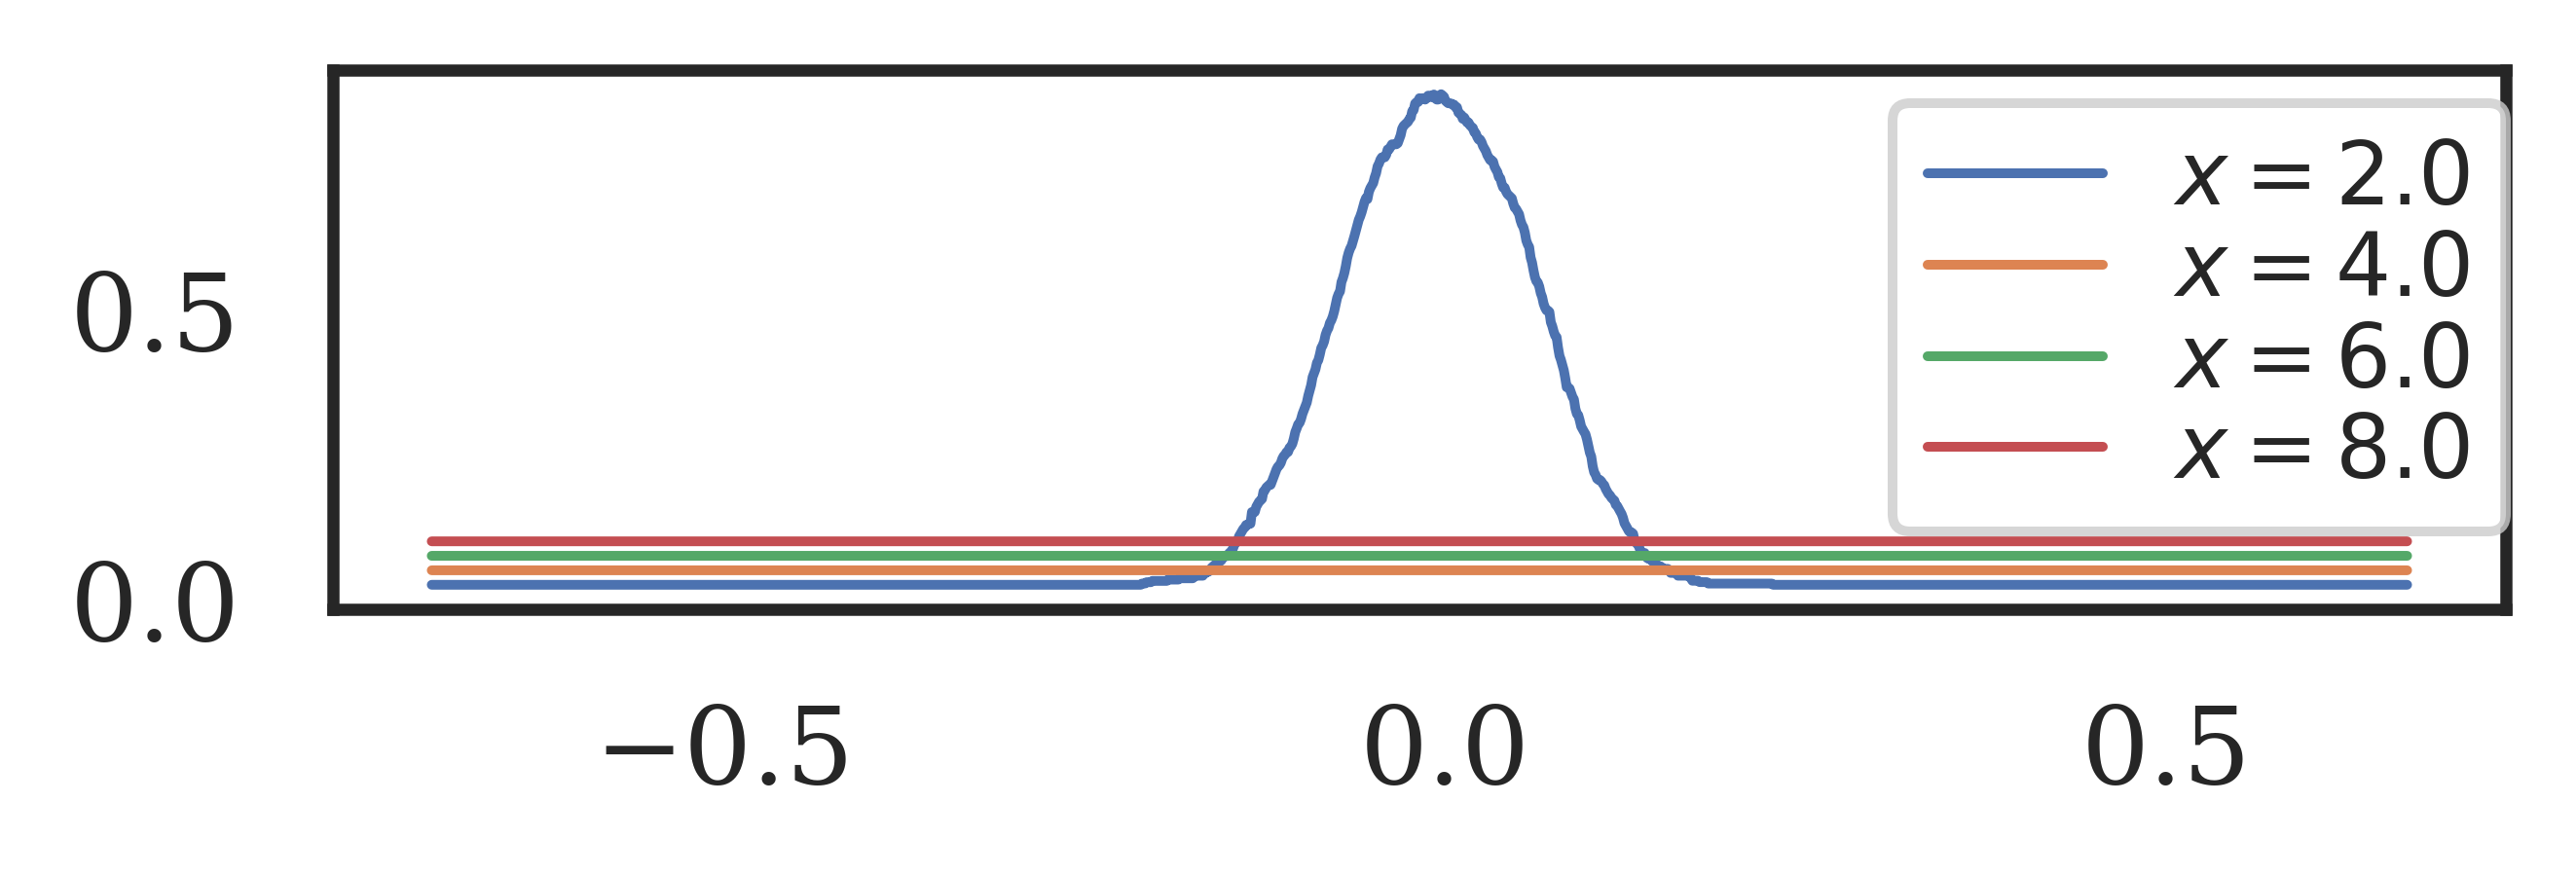

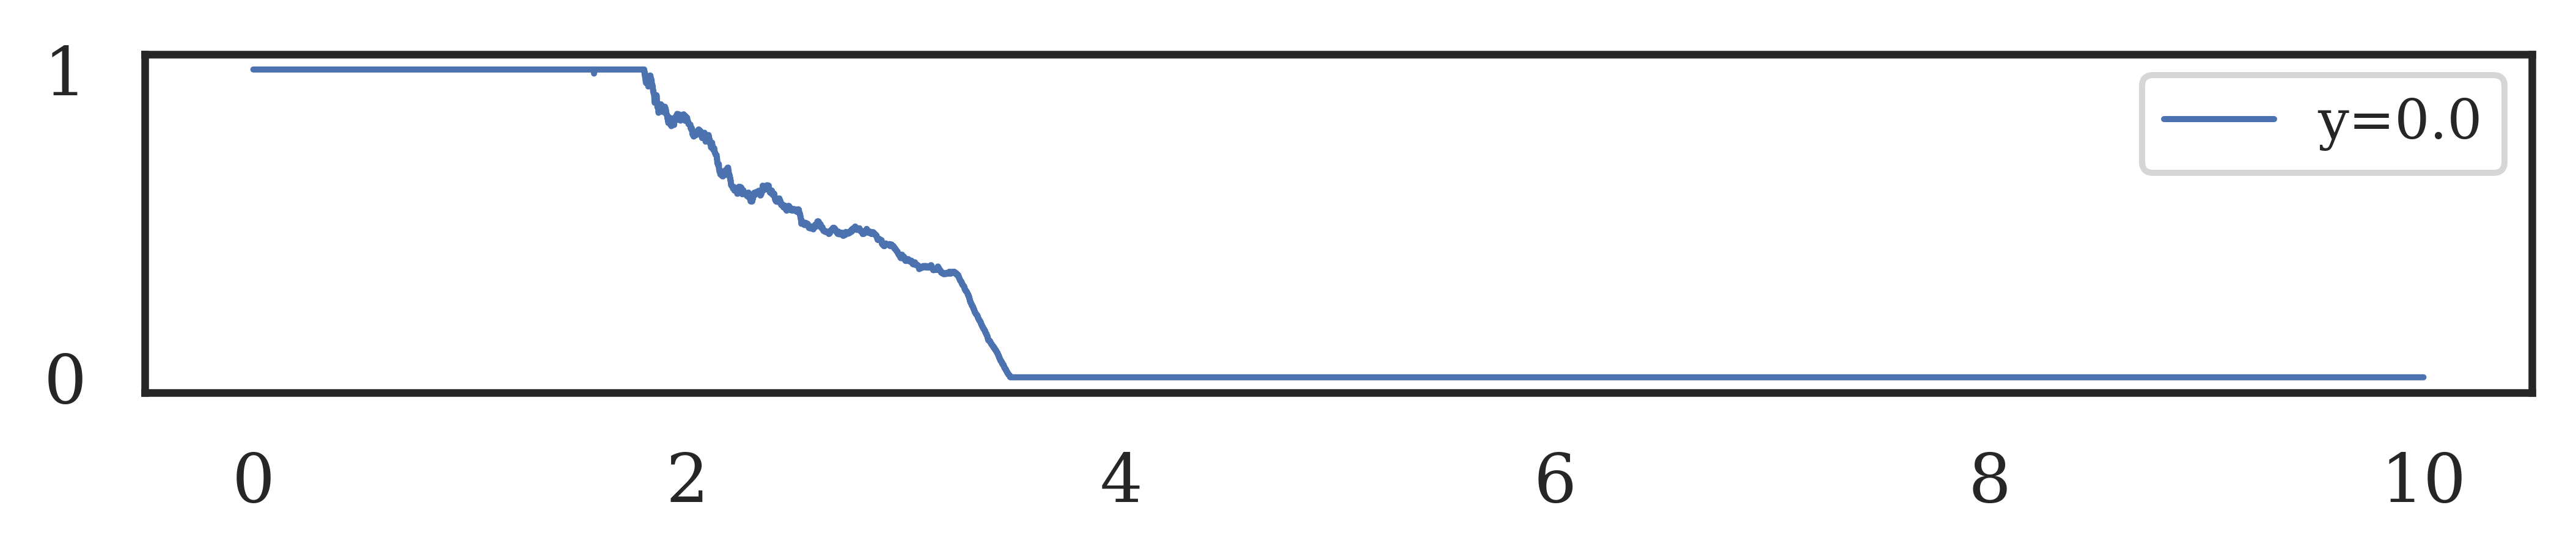

: 

In [ ]:
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 360

importlib.reload(config)
importlib.reload(agent_analysis)
import sim_analysis
importlib.reload(sim_analysis)

forCosyne = False
forNMI = True

for idx, row in ep_selected.iterrows():
#     print(row)
    model_seed = row['model_seed']
    dataset = row['dataset']
    birthx = row['birthx']
    idx = row['idx']
    task = dataset if birthx==1.0 else f"{dataset}_{birthx}"
#     print(task)

    subset = selected_df_all.query("outcome == 'HOME' and dataset == @task and model_seed == @model_seed and idx == @idx")
#     print(subset)
    logs = subset['log'].to_list() # only one episode in logs
    zoom = row['zoom']
    zoom = -1

    agent_analysis.visualize_episodes(logs, 
                                      zoom=3, 
                                      dataset=dataset,
                                      animate=False,
                                      plotsize=(7,7), 
                                      birthx=2.5,
                                     )
    
    if forNMI:
        ax = plt.gca()
        ax.axvline(x=2, linestyle=':', lw=1.0)
        ax.axvline(x=4, linestyle=':', lw=1.0)
        ax.axvline(x=6, linestyle=':', lw=1.0)
        ax.axvline(x=8, linestyle=':', lw=1.0)
        ax.axhline(y=0, linestyle=':', lw=1.0)

    plt.show()

    
    # Plot centerlines for Cosyne abstract
    if ('noisy3' in dataset or 'switch' in dataset) and forCosyne: 
        centerline_filename = f'{config.datadir}/centerline_data_{dataset}.pickle' 
        centerline_df = pd.read_pickle(centerline_filename)
        
        t_val = [record[0]['t_val'] for record in logs[0]['infos']][-1]
        tidx = int(t_val*100)
        centerline_t = centerline_df[ centerline_df.tidx == tidx ]
        plt.plot(centerline_t['x'], centerline_t['y'], lw=3, alpha=1.0, c='r', label='Centerline')
        plt.legend()
        plt.show()
        
    # For NMI manuscript -- Odor timecourse       
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 360

importlib.reload(config)
importlib.reload(agent_analysis)
import sim_analysis
importlib.reload(sim_analysis)

forCosyne = False
forNMI = True

for idx, row in ep_selected.iterrows():
#     print(row)
    model_seed = row['model_seed']
    dataset = row['dataset']
    birthx = row['birthx']
    idx = 14
    task = dataset if birthx==1.0 else f"{dataset}_{birthx}"
#     print(task)

    subset = selected_df_all.query("outcome == 'HOME' and dataset == @task and model_seed == @model_seed and idx == @idx")
#     print(subset)
    logs = subset['log'].to_list() # only one episode in logs
    zoom = row['zoom']
    zoom = -1

    agent_analysis.visualize_episodes(logs, 
                                      zoom=3, 
                                      dataset=dataset,
                                      animate=False,
                                      plotsize=(7,7), 
                                      birthx=2.5,
                                     )
    
    if forNMI:
        ax = plt.gca()
        ax.axvline(x=2, linestyle=':', lw=1.0)
        ax.axvline(x=4, linestyle=':', lw=1.0)
        ax.axvline(x=6, linestyle=':', lw=1.0)
        ax.axvline(x=8, linestyle=':', lw=1.0)
        ax.axhline(y=0, linestyle=':', lw=1.0)

    plt.show()

    
    # Plot centerlines for Cosyne abstract
    if ('noisy3' in dataset or 'switch' in dataset) and forCosyne: 
        centerline_filename = f'{config.datadir}/centerline_data_{dataset}.pickle' 
        centerline_df = pd.read_pickle(centerline_filename)
        
        t_val = [record[0]['t_val'] for record in logs[0]['infos']][-1]
        tidx = int(t_val*100)
        centerline_t = centerline_df[ centerline_df.tidx == tidx ]
        plt.plot(centerline_t['x'], centerline_t['y'], lw=3, alpha=1.0, c='r', label='Centerline')
        plt.legend()
        plt.show()
        
    # For NMI manuscript -- Odor timecourse       
# ...existing code...
    # For NMI manuscript -- Odor timecourse       
    traj_df = log_analysis.get_traj_df(logs[0], 
        extended_metadata=False, 
        squash_action=True,
        seed=model_seed)
    regime_colorby = log_analysis.regime_to_colors( traj_df['regime'].to_list() )
    odor_cols = ['odor_clip']
    
    traj_df['odor_clip'] = traj_df['odor_clip'].apply(lambda c: c if c > config.env['odor_threshold'] else 0.0)
    
    # Create colored C(t) plot
    fig, ax = plt.subplots(figsize=(7,1))
    
    x = np.arange(len(traj_df))
    y = traj_df['odor_clip'].values
    
    # Plot segments with different colors
    for i in range(len(x)-1):
        # Green when on plume (odor > 0), blue when off plume
        color = 'green' if y[i] > 0 else 'blue'
        ax.plot(x[i:i+2], y[i:i+2], color=color, linewidth=1.5)
    
    ax.set_ylabel('C(t)')
    ax.set_xlabel('Time [frames]')
    ax.set_ylim(-0.05, 1.05)
    
    # Add legend with custom patches
    from matplotlib.patches import Patch
    on_patch = Patch(color='green', label='On plume')
    off_patch = Patch(color='blue', label='Off plume')
    ax.legend(handles=[on_patch, off_patch], loc='upper left')
    
    plt.show()
# ...existing code...    
    # For NMI manuscript -- Odor crossections
    radiusx=1.0
    t_start = logs[0]['infos'][0][0]['t_val']
    t_end = logs[0]['infos'][-1][0]['t_val']
    data_puffs, data_wind = sim_analysis.load_plume(dataset, 
        t_val_min=t_start-1.0, 
        t_val_max=t_end+1.0,
        radius_multiplier=radiusx,
        puff_sparsity=np.clip(birthx, a_min=0.01, a_max=1.00),
        diffusion_multiplier=0.33,                                                        

    )
    data_at_t = data_puffs[data_puffs.time==t_end]

    # Make walk_y plots
#     y_vals=np.linspace(-1.0, 1.0, 401) # 200cm/401 = ~0.5cm step
#     ylims = [ traj_df['loc_y'].min() - 0.25, traj_df['loc_y'].max() + 0.25 ]
#     y_vals=np.linspace(ylims[0], ylims[1], int((ylims[1]-ylims[0])*500)) # 0.5cm step
    y_max = max(data_puffs[data_puffs.time == t_end].y.max(), traj_df.iloc[:,1].max()) + 0.5
    y_min = min(data_puffs[data_puffs.time == t_end].y.min(), traj_df.iloc[:,1].min()) - 0.5
    ylims = [y_min, y_max]
#     y_vals=np.linspace(ylims[0], ylims[1], int((ylims[1]-ylims[0])*200)) # 0.5cm step
    y_vals=np.linspace(ylims[0], ylims[1], int((ylims[1]-ylims[0])*1000)) # 0.1cm step
    print('ylims', ylims)
    fig = plt.figure(figsize=(4,1))
    for x_val in [2., 4., 6., 8.]:
        cs = walk_y(data_at_t, x_val=x_val, y_vals=y_vals)
        cs = pd.Series(cs).clip(0.0, 1.0)
        cs = cs.apply(lambda c: c if c > config.env['odor_threshold'] else 0.0)
        plt.plot(y_vals, cs + x_val/80, linewidth=1.0, label=f'$x={x_val}$')
        # https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot
    plt.legend(loc='upper right', labelspacing=0.07, bbox_to_anchor=(1.02, 1.02), prop={'size': 9})
    plt.show()
    
    # Make walk_x plot
    y_val = 0.0
#     x_vals=np.linspace(10.0, 0.0, 2001) # 1000cm/5001 = ~0.5cm step
    x_vals=np.linspace(10.0, 0.0, 10001) # 1000cm/5001 = ~0.5cm step
    cs = walk_x(data_at_t, y_val, x_vals=x_vals)
    cs = pd.Series(cs).clip(0.0, 1.0)
    cs = cs.apply(lambda c: c if c > config.env['odor_threshold'] else 0.0)

    fig = plt.figure(figsize=(7,1))
    # plt.plot(x_vals, cs, linewidth=1.0, label=r'$C(x) _{y=0}$')
    plt.plot(x_vals, cs, linewidth=1.0, label=f'y={y_val}')
    plt.ylim(-0.05,1.05)
    # plt.ylim(None, 1)
    # plt.yscale('log')
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1.02), prop={'size': 9})
    plt.show()
    


#     odor_cols = ['odor_obs', 'odor_01', 'odor_clip']
#     traj_df.loc[:, odor_cols].plot(title='Odor level vs. Time', subplots=True, figsize=(7,3))



        
# subset =  selected_df_all.query("outcome == 'HOME' and dataset == @task and model_seed == '3307e9'").sample(5)
# subset =  selected_df_all.query("outcome == 'HOME' and dataset == @task").groupby(by='model_seed').sample(1)
# logs = subset['log'].to_list()
# idxs = subset['idx'].to_list()
# print(idxs)

# from matplotlib.lines import Line2D
# handles, labels = plt.gca().get_legend_handles_labels()
# patch1 = mpatches.Patch(color=config.traj_colormap['off'], label='Off plume')   
# patch2 = mpatches.Patch(color=config.traj_colormap['on'], label='On plume')   
# # line = Line2D([0], [0], label = 'manual line',color='b')
# handles.extend([patch1, patch2])
# # handles.extend([patch,line])
# plt.legend(handles=handles)
# plt.show()
    
    # For NMI manuscript -- Odor crossections
    radiusx=1.0
    t_start = logs[0]['infos'][0][0]['t_val']
    t_end = logs[0]['infos'][-1][0]['t_val']
    data_puffs, data_wind = sim_analysis.load_plume(dataset, 
        t_val_min=t_start-1.0, 
        t_val_max=t_end+1.0,
        radius_multiplier=radiusx,
        puff_sparsity=np.clip(birthx, a_min=0.01, a_max=1.00),
        diffusion_multiplier=0.33,                                                        

    )
    data_at_t = data_puffs[data_puffs.time==t_end]

    # Make walk_y plots
#     y_vals=np.linspace(-1.0, 1.0, 401) # 200cm/401 = ~0.5cm step
#     ylims = [ traj_df['loc_y'].min() - 0.25, traj_df['loc_y'].max() + 0.25 ]
#     y_vals=np.linspace(ylims[0], ylims[1], int((ylims[1]-ylims[0])*500)) # 0.5cm step
    y_max = max(data_puffs[data_puffs.time == t_end].y.max(), traj_df.iloc[:,1].max()) + 0.5
    y_min = min(data_puffs[data_puffs.time == t_end].y.min(), traj_df.iloc[:,1].min()) - 0.5
    ylims = [y_min, y_max]
#     y_vals=np.linspace(ylims[0], ylims[1], int((ylims[1]-ylims[0])*200)) # 0.5cm step
    y_vals=np.linspace(ylims[0], ylims[1], int((ylims[1]-ylims[0])*1000)) # 0.1cm step
    print('ylims', ylims)
    fig = plt.figure(figsize=(4,1))
    for x_val in [2., 4., 6., 8.]:
        cs = walk_y(data_at_t, x_val=x_val, y_vals=y_vals)
        cs = pd.Series(cs).clip(0.0, 1.0)
        cs = cs.apply(lambda c: c if c > config.env['odor_threshold'] else 0.0)
        plt.plot(y_vals, cs + x_val/80, linewidth=1.0, label=f'$x={x_val}$')
        # https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot
    plt.legend(loc='upper right', labelspacing=0.07, bbox_to_anchor=(1.02, 1.02), prop={'size': 9})
    plt.show()
    
    # Make walk_x plot
    y_val = 0.0
#     x_vals=np.linspace(10.0, 0.0, 2001) # 1000cm/5001 = ~0.5cm step
    x_vals=np.linspace(10.0, 0.0, 10001) # 1000cm/5001 = ~0.5cm step
    cs = walk_x(data_at_t, y_val, x_vals=x_vals)
    cs = pd.Series(cs).clip(0.0, 1.0)
    cs = cs.apply(lambda c: c if c > config.env['odor_threshold'] else 0.0)

    fig = plt.figure(figsize=(7,1))
    # plt.plot(x_vals, cs, linewidth=1.0, label=r'$C(x) _{y=0}$')
    plt.plot(x_vals, cs, linewidth=1.0, label=f'y={y_val}')
    plt.ylim(-0.05,1.05)
    # plt.ylim(None, 1)
    # plt.yscale('log')
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1.02), prop={'size': 9})
    plt.show()
    


#     odor_cols = ['odor_obs', 'odor_01', 'odor_clip']
#     traj_df.loc[:, odor_cols].plot(title='Odor level vs. Time', subplots=True, figsize=(7,3))



        
# subset =  selected_df_all.query("outcome == 'HOME' and dataset == @task and model_seed == '3307e9'").sample(5)
# subset =  selected_df_all.query("outcome == 'HOME' and dataset == @task").groupby(by='model_seed').sample(1)
# logs = subset['log'].to_list()
# idxs = subset['idx'].to_list()
# print(idxs)

# from matplotlib.lines import Line2D
# handles, labels = plt.gca().get_legend_handles_labels()
# patch1 = mpatches.Patch(color=config.traj_colormap['off'], label='Off plume')   
# patch2 = mpatches.Patch(color=config.traj_colormap['on'], label='On plume')   
# # line = Line2D([0], [0], label = 'manual line',color='b')
# handles.extend([patch1, patch2])
# # handles.extend([patch,line])
# plt.legend(handles=handles)
# plt.show()


constantx5b5
Applying diffusion_multiplier 0.5


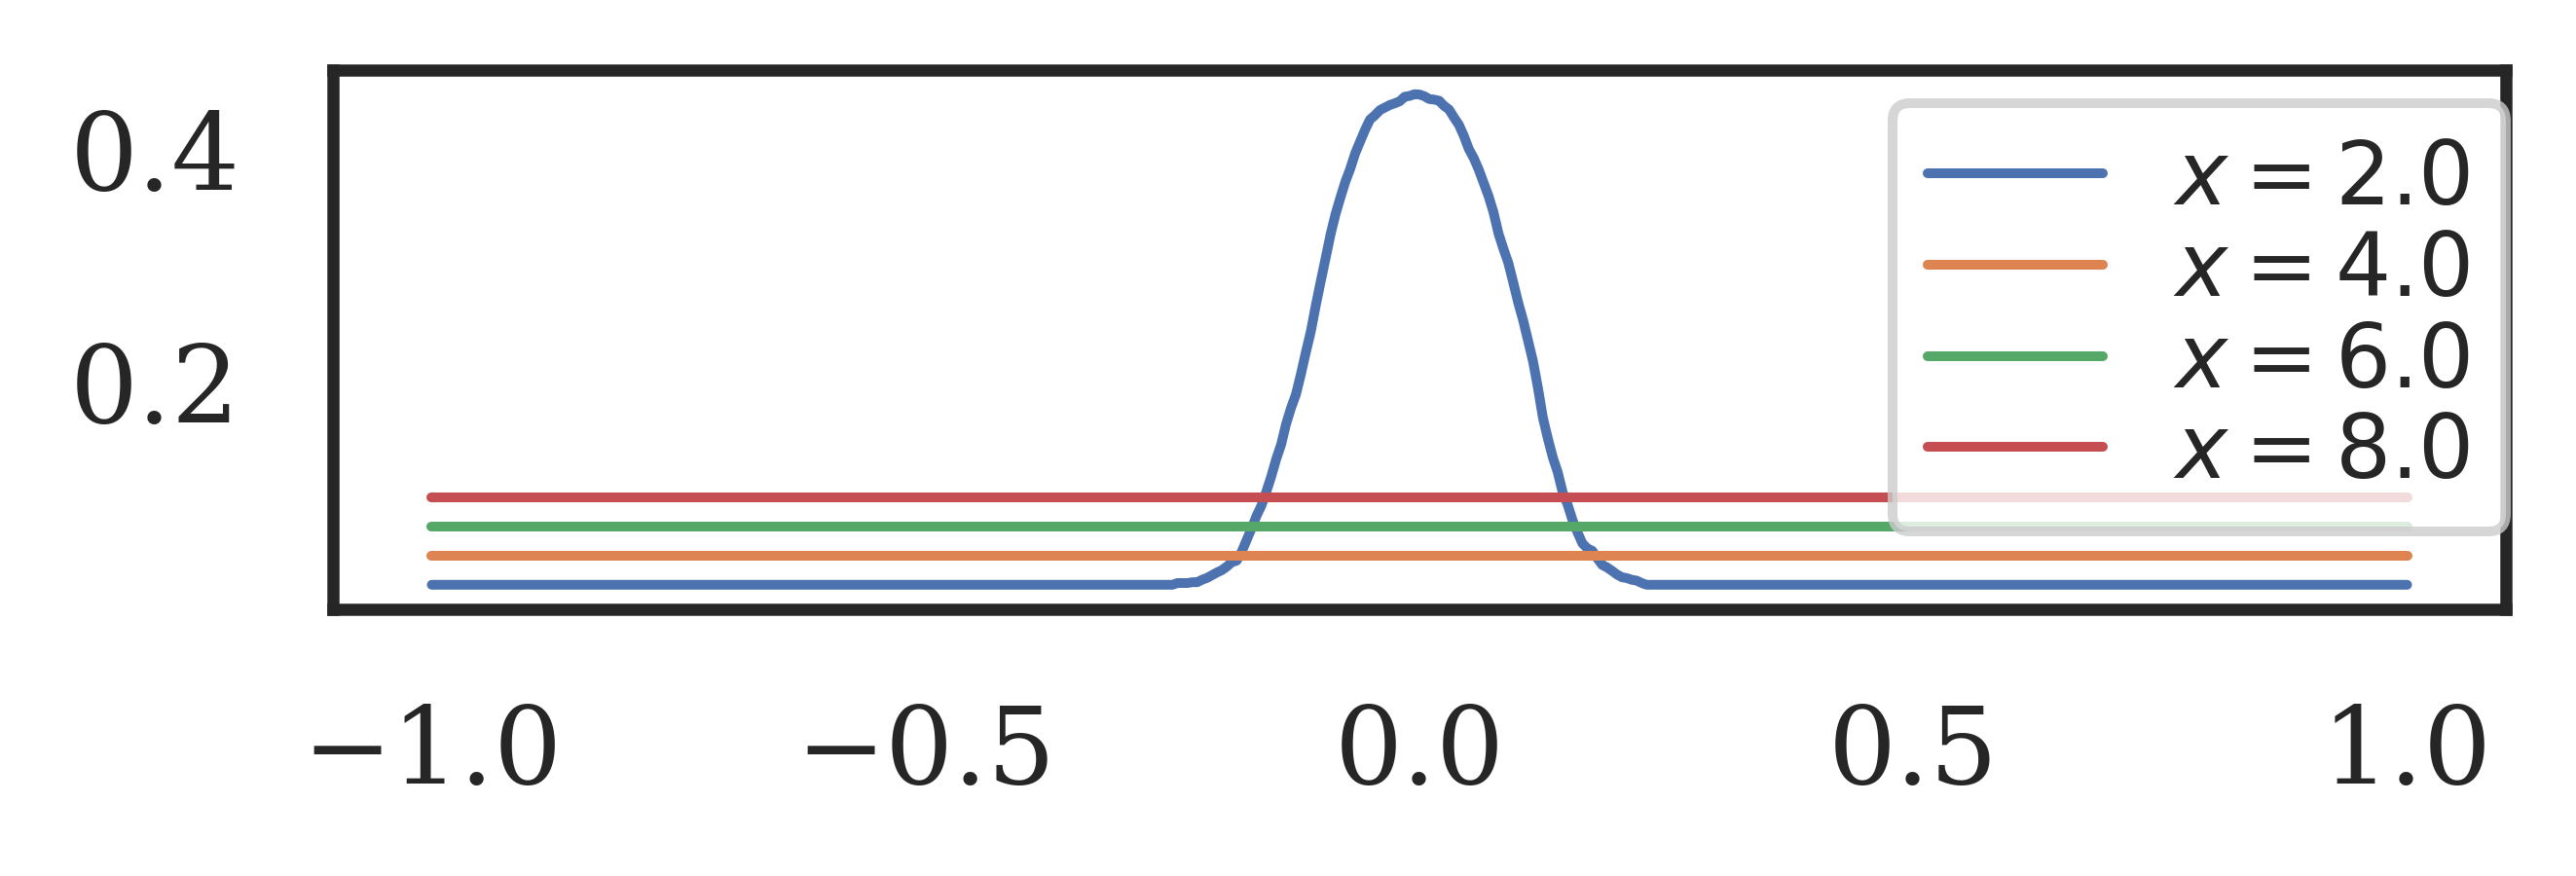

In [102]:
# def visualize_single_episode_crossections():

episode_logs = logs    
ep_log = logs[0]


t_starts = []
t_ends = []
for log in episode_logs: 
    t_starts.append( log['infos'][0][0]['t_val'] )
    t_ends.append( log['infos'][-1][0]['t_val'] )


t_val_end = ep_log['infos'][-1][0]['t_val']

radiusx = 1.0    
data_puffs_all, data_wind_all = sim_analysis.load_plume(dataset, 
    t_val_min=min(t_starts)-1.0, 
    t_val_max=max(t_ends)+1.0,
    radius_multiplier=radiusx,
    puff_sparsity=np.clip(birthx, a_min=0.01, a_max=1.00),
    diffusion_multiplier=0.5,                                                        
    )
t_vals_all = data_puffs_all['time'].unique()

t_val = t_val_end

# fig, ax = sim_analysis.plot_puffs_and_wind_vectors(data_puffs_all, data_wind_all, t_val, 
#                                    fname='', plotsize=None, show=True)

# data_at_t = data[np.isclose(data.time, t_val, atol=1e-3)]
# c = data_at_t.concentration
data_at_t = data_puffs_all[data_puffs_all.time==t_val]





y_vals=np.linspace(-1.0, 1.0, 401) # 200cm/401 = ~0.5cm step
fig = plt.figure(figsize=(4,1))
for x_val in [2., 4., 6., 8.]:
    cs = walk_y(data_at_t, x_val=x_val, y_vals=y_vals)
    cs = pd.Series(cs)
#     cs = walk_y(data_at_t, x_val=2.0, y_vals=y_vals)
#     plt.plot(y_vals, cs, linewidth=1.0, label=r'$C(x) _{y=0}$')

# https://stackoverflow.com/questions/60150031/how-to-display-latex-f-strings-in-matplotlib 
#     plt.plot(y_vals, cs + x_val/80, linewidth=1.0, label=f'$C(y)_{{x={x_val}}}$') # works

    plt.plot(y_vals, cs + x_val/80, linewidth=1.0, label=f'$x={x_val}$')

    # https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot
plt.legend(loc='upper right', labelspacing=0.07, bbox_to_anchor=(1.02, 1.02), prop={'size': 9})



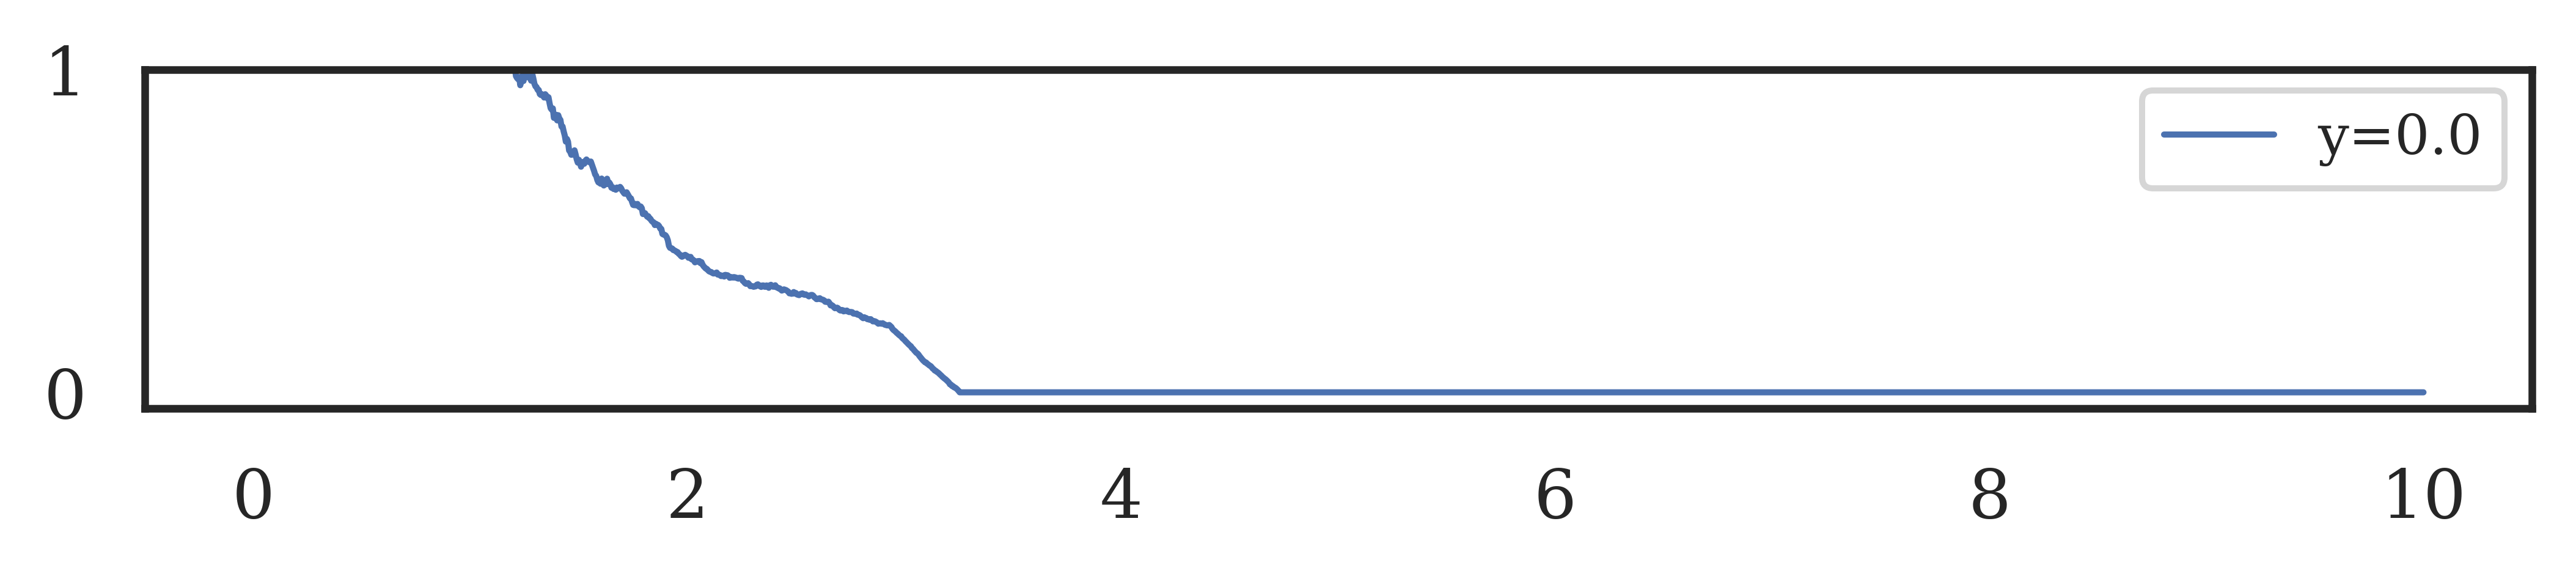

In [103]:

y_val = 0.0
x_vals=np.linspace(10.0, 0.0, 2001) # 1000cm/5001 = ~0.5cm step
cs = walk_x(data_at_t, y_val, x_vals=x_vals)
cs = pd.Series(cs)

fig = plt.figure(figsize=(7,1))
# plt.plot(x_vals, cs, linewidth=1.0, label=r'$C(x) _{y=0}$')
plt.plot(x_vals, cs, linewidth=1.0, label=f'y={y_val}')
plt.ylim(-0.05,1)
# plt.ylim(None, 1)
# plt.yscale('log')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.02), prop={'size': 9})
# x_vals

In [104]:
# import matplotlib.pyplot as plt
# # red_patch = mpatches.Patch(color='lime', label='The red data')
# # blue_patch = mpatches.Patch(color='blue', label='The blue data')
# # plt.legend(handles=[red_patch, blue_patch])
# patch1 = mpatches.Patch(edgecolor='blue', facecolor='red', lw=3, label='Off plume')   
# patch2 = mpatches.Patch(edgecolor='lime', facecolor='red', lw=3, label='On plume')   
# line = Line2D([0], [0], label = 'manual line',color='blue', lw=4, mec='blue', mfc='red',)
# plt.legend(handles=[patch1, patch2, line])
# plt.show()

In [ ]:
#STOP # throw error

NameError: name 'STOP' is not defined

## Figure 2

In [106]:
# # Find a few good examples
%config InlineBackend.figure_format = 'png'
mpl.rcParams['figure.dpi'] = 100

importlib.reload(agent_analysis)
import sim_analysis
importlib.reload(sim_analysis)
dataset = 'constantx5b5'
birthx = 1.0

task = dataset if birthx==1.0 else f"{dataset}_{birthx}"
non_home_subset = selected_df_all.query("outcome != 'HOME' and dataset == @task and model_seed == '3307e9'")
subset = non_home_subset.sample(min(5, len(non_home_subset)))
# # subset =  selected_df_all.query("outcome == 'HOME' and dataset == @task").groupby(by='model_seed').sample(1)
# logs = subset['log'].to_list()
# idxs = subset['idx'].to_list()
# print(idxs)
# agent_analysis.visualize_episodes(logs, 
#                                   zoom=2, 
#                                   dataset=dataset,
#                                   episode_idxs=idxs,
#                                   animate=False,
#                                   plotsize=(7,7), 
#                                   birthx=birthx,
#                                   colorby='regime'
#                                  )

In [ ]:
ep_selected2 = [] # selected in above cell
ep_selected2.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                    'idx':130, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
ep_selected2.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                    'idx':189, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})
ep_selected2 = pd.DataFrame(ep_selected2)


%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 360

importlib.reload(agent_analysis)
importlib.reload(sim_analysis)
importlib.reload(log_analysis)
importlib.reload(config)

for idx, row in ep_selected2.iterrows():
    model_seed = row['model_seed']
    dataset = row['dataset']
    birthx = row['birthx']
    idx = row['idx']
    outcome = row['outcome']
    task = dataset if birthx==1.0 else f"{dataset}_{birthx}"

    subset = selected_df_all.query("outcome == @outcome and dataset == @task and model_seed == @model_seed and idx == @idx")
#     print(subset)
    logs = subset['log'].to_list()
    zoom = row['zoom']
    zoom = -1
    
    viz_log = logs[0]
    traj_df = log_analysis.get_traj_df(viz_log, 
        extended_metadata=False, 
        squash_action=True,
        see d=model_seed)
    regime_colorby = log_analysis.regime_to_colors( traj_df['regime'].to_list() )


    agent_analysis.visualize_episodes(logs, 
                                      zoom=zoom, 
                                      dataset=dataset,
                                      animate=False,
                                      plotsize=(7,7), 
                                      birthx=birthx,
                                      colorby=regime_colorby,
#                                       colorby='regime',
                                     )
    
#     if outcome == 'HOME': # Add manually
#         plt.ylabel("Arena width [m]")
#         plt.xlabel("Arena length [m]")

# from matplotlib.lines import Line2D
handles, labels = plt.gca().get_legend_handles_labels()
patch1 = mpatches.Patch(color=regime_colormap['TRACK'], label='Track')   
patch2 = mpatches.Patch(color=regime_colormap['RECOVER'], label='Recover')   
patch3 = mpatches.Patch(color=regime_colormap['SEARCH'], label='Lost')   
# line = Line2D([0], [0], label = 'manual line',color='b')
# line = Line2D([0], [0], label = 'manual line',color='b')
handles.extend([patch1, patch2, patch3])
# handles.extend([patch,line])
plt.legend(handles=handles, loc='upper left')
plt.show()

ep_selected2

IndexError: list index out of range

## Figure 6 - Dynamics associated with each Regime

In [87]:
ep_fig6 = []
ep_fig6.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                    'idx':108, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
ep_fig6.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                    'idx':189, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})
ep_fig6 = pd.DataFrame(ep_fig6)


%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 300

importlib.reload(agent_analysis)
import sim_analysis
importlib.reload(sim_analysis)
importlib.reload(config)

for idx, row in ep_fig6.iterrows():
    model_seed = row['model_seed']
    dataset = row['dataset']
    birthx = row['birthx']
    idx = row['idx']
    outcome = row['outcome']
    task = dataset if birthx==1.0 else f"{dataset}_{birthx}"

    subset = selected_df_all.query("outcome == @outcome and dataset == @task and model_seed == @model_seed and idx == @idx")
#     print(subset)
    logs = subset['log'].to_list()
    zoom = row['zoom']
    zoom = -1
    
    traj_df = log_analysis.get_traj_df(logs[0], 
            extended_metadata=True, 
            squash_action=True, 
            seed=model_seed,
          )
    regime_colorby = log_analysis.regime_to_colors( traj_df['regime'].to_list() )




    agent_analysis.visualize_episodes(logs, 
                                      zoom=zoom, 
                                      dataset=dataset,
                                      animate=False,
                                      plotsize=(5,5) if outcome == 'HOME' else (6,6), 
                                      birthx=birthx,
                                      colorby=regime_colorby,
#                                       colorby='regime',
                                     )
    
    if outcome == 'HOME':
        plt.xlim(-0.15, 0.5)
        plt.ylabel("Arena width [m]")
        plt.xlabel("Arena length [m]")
    else:
        plt.xlim(-0.15, 0.5)
        # from matplotlib.lines import Line2D
        handles, labels = plt.gca().get_legend_handles_labels()
        patch1 = mpatches.Patch(color=regime_colormap['TRACK'], label='Track')   
        patch2 = mpatches.Patch(color=regime_colormap['RECOVER'], label='Recover')   
        patch3 = mpatches.Patch(color=regime_colormap['SEARCH'], label='Lost')   

        # line = Line2D([0], [0], label = 'manual line',color='b')
        # line = Line2D([0], [0], label = 'manual line',color='b')
        handles.extend([patch1, patch2, patch3])
        # handles.extend([patch,line])
        plt.legend(handles=handles, loc='upper left')
        plt.show()
        
    # Neural activity
    colname = 'regime'

    ep_activity = np.array(pd.DataFrame(logs[0]['activity'])['rnn_hxs'].to_list())
    pca = skld.PCA(3, whiten=False)
    if outcome == 'HOME':
        pca.fit(ep_activity[ (traj_df['regime'] == 'TRACK').to_numpy(),: ]  )
    else:
        pca.fit(ep_activity[ (traj_df['regime'] == 'SEARCH').to_numpy(),: ]  )    
    X_pca = pca.transform(ep_activity)

    # Plot 2D
#     fig = plt.figure(figsize=(3,3))
#     ax = fig.gca()
#     ax.plot(X_pca[:, 0], X_pca[:, 1],  linewidth=0.6, c='grey', alpha=0.5)
#     colors = [config.regime_colormap[x] for x in traj_df[colname]]
#     sc = ax.scatter(X_pca[:, 0], X_pca[:, 1],
#             s=20, c=colors, cmap=plt.cm.get_cmap('RdBu'), vmin=0., vmax=1.)
#     ax.scatter(X_pca[0, 0], X_pca[0, 1], c='k', marker='o', s=100) # Start
#     ax.scatter(X_pca[-1, 0], X_pca[-1, 1], c='k', marker='x', s=200) # End
#     ax.set_xlabel(f'PC1 (VarExp: {pca.explained_variance_ratio_[0]:0.2f})')
#     ax.set_ylabel(f'PC2 (VarExp: {pca.explained_variance_ratio_[1]:0.2f})')
# #     ax.set_aspect('equal')    
#     plt.tight_layout()
#     plt.show()

    # Quiver 2D
    fig = plt.figure(figsize=(2.5,2.5))
    ax = fig.gca()
    U = X_pca[1:, 0] - X_pca[:-1, 0]
    V = X_pca[1:, 1] - X_pca[:-1, 1]
    colors = [config.regime_colormap[x] for x in traj_df[colname].iloc[:-1]]
    ax.plot(X_pca[:, 0], X_pca[:, 1],  linewidth=0.6, c='grey', alpha=0.5)
    ax.quiver(X_pca[:-1, 0], X_pca[:-1, 1], U, V,
              width=0.008,
              color=colors, alpha=0.95)
    ax.scatter(X_pca[0, 0], X_pca[0, 1], c='k', marker='o', s=50) # Start
    ax.scatter(X_pca[-1, 0], X_pca[-1, 1], c='k', marker='x', s=100) # End
    ax.set_xlabel(f'PC1 (VarExp: {pca.explained_variance_ratio_[0]:0.2f})')
    ax.set_ylabel(f'PC2 (VarExp: {pca.explained_variance_ratio_[1]:0.2f})')
    plt.tight_layout()
    plt.show()


    
    # Plot 3D
#     fig = plt.figure(figsize=(4,4))
#     ax = fig.gca(projection='3d')
#     ax.plot(X_pca[:, 0], X_pca[:, 1],  linewidth=0.6, c='grey', alpha=0.5)
#     colors = [config.regime_colormap[x] for x in traj_df[colname]]
#     ax.plot(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], linewidth=0.6, c='grey', alpha=0.5)
#     sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
#             s=20, c=colors, vmin=0, vmax=1)
#     ax.scatter(X_pca[0, 0], X_pca[0, 1], X_pca[0, 2], c='k', marker='o', s=100) # Start
#     ax.scatter(X_pca[-1, 0], X_pca[-1, 1], X_pca[-1, 2], c='k', marker='x', s=150) # End
#     ax.set_xlabel(f'PC1 (VarExp: {pca.explained_variance_ratio_[0]:0.2f})')
#     ax.set_ylabel(f'PC2 (VarExp: {pca.explained_variance_ratio_[1]:0.2f})')
#     ax.set_zlabel(f'PC3 (VarExp: {pca.explained_variance_ratio_[2]:0.2f})')
#     print(f'ax.elev: {ax.elev}, ax.azim {ax.azim}') # Get original rotation
#     if outcome == 'HOME':
#         ax.view_init(30, 30)
#         ax.set_xlim(-1, 3.5)
#     plt.tight_layout()
#     plt.show()


ep_fig6

IndexError: list index out of range

In [ ]:
# Fig 6 appendices
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 300

importlib.reload(agent_analysis)
import sim_analysis
importlib.reload(sim_analysis)
importlib.reload(config)

# Random sample
ep_fig6_appendix = selected_df_all.query("dataset == 'constantx5b5'").groupby(by=["model_seed", "outcome",]).sample(1)
# Used in manuscript
ep_fig6_appendix = []
ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                    'idx':108, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                    'idx':189, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})

ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'9781ba', 
                    'idx':196, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'9781ba', 
                    'idx':130, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})

ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'541058', 
                    'idx':165, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'541058', 
                    'idx':103, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})

ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'2760377', 
                    'idx':148, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'2760377', 
                    'idx':136, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})

ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'3199993', 
                    'idx':161, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'3199993', 
                    'idx':144, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})





ep_fig6_appendix = pd.DataFrame(ep_fig6_appendix)




for idx, row in ep_fig6_appendix.iterrows():
    model_seed = row['model_seed']
    dataset = row['dataset']
    birthx = 1.0
    idx = row['idx']
    outcome = row['outcome']
    task = dataset if birthx==1.0 else f"{dataset}_{birthx}"

    subset = selected_df_all.query("outcome == @outcome and dataset == @task and model_seed == @model_seed and idx == @idx")
#     print(subset)
    logs = subset['log'].to_list()
#     zoom = row['zoom']
    zoom = -1
    
    traj_df = log_analysis.get_traj_df(logs[0], 
            extended_metadata=True, 
            squash_action=True, 
            seed=model_seed,
          )
    regime_colorby = log_analysis.regime_to_colors( traj_df['regime'].to_list() )




    agent_analysis.visualize_episodes(logs, 
                                      zoom=zoom, 
                                      dataset=dataset,
                                      animate=False,
                                      plotsize=(5,5) if outcome == 'HOME' else (6,6), 
                                      birthx=birthx,
                                      colorby=regime_colorby,
#                                       colorby='regime',
                                     )
    
    if outcome == 'HOME':
        plt.xlim(-0.15, 0.5)
        plt.ylabel("Arena width [m]")
        plt.xlabel("Arena length [m]")
    else:
        plt.xlim(-0.15, 0.5)
        # from matplotlib.lines import Line2D
        handles, labels = plt.gca().get_legend_handles_labels()
        patch1 = mpatches.Patch(color=regime_colormap['TRACK'], label='Track')   
        patch2 = mpatches.Patch(color=regime_colormap['RECOVER'], label='Recover')   
        patch3 = mpatches.Patch(color=regime_colormap['SEARCH'], label='Lost')   

        # line = Line2D([0], [0], label = 'manual line',color='b')
        # line = Line2D([0], [0], label = 'manual line',color='b')
        handles.extend([patch1, patch2, patch3])
        # handles.extend([patch,line])
        plt.legend(handles=handles, loc='upper left')
        plt.show()
        
    # Neural activity
    colname = 'regime'

    ep_activity = np.array(pd.DataFrame(logs[0]['activity'])['rnn_hxs'].to_list())
    pca = skld.PCA(3, whiten=False)
    if outcome == 'HOME':
        pca.fit(ep_activity[ (traj_df['regime'] == 'TRACK').to_numpy(),: ]  )
    else:
        pca.fit(ep_activity[ (traj_df['regime'] == 'SEARCH').to_numpy(),: ]  )    
    X_pca = pca.transform(ep_activity)

    # Quiver 2D
    fig = plt.figure(figsize=(2.5,2.5))
    ax = fig.gca()
    U = X_pca[1:, 0] - X_pca[:-1, 0]
    V = X_pca[1:, 1] - X_pca[:-1, 1]
    colors = [config.regime_colormap[x] for x in traj_df[colname].iloc[:-1]]
    ax.plot(X_pca[:, 0], X_pca[:, 1],  linewidth=0.6, c='grey', alpha=0.5)
    ax.quiver(X_pca[:-1, 0], X_pca[:-1, 1], U, V,
              width=0.008,
              color=colors, alpha=0.95)
    ax.scatter(X_pca[0, 0], X_pca[0, 1], c='k', marker='o', s=50) # Start
    ax.scatter(X_pca[-1, 0], X_pca[-1, 1], c='k', marker='x', s=100) # End
    ax.set_xlabel(f'PC1 (VarExp: {pca.explained_variance_ratio_[0]:0.2f})')
    ax.set_ylabel(f'PC2 (VarExp: {pca.explained_variance_ratio_[1]:0.2f})')
    plt.tight_layout()
    fname = f"{outdir}/regime_neural_{model_seed}_{outcome}_{idx}.png"
    print("Saving:", fname)
    plt.savefig(fname, dpi=dpi_save, bbox_inches='tight', transparent=True)
    plt.show()


In [ ]:
# (traj_df['regime'] == 'TRACK').to_numpy().flatten()
# np.array(ep_activity).shape, traj_df.shape

## Figure 7 TTCS

In [ ]:
model_seed = '3307e9'
model_dir = '/home/satsingh/plume/plumezoo/latest/fly/memory/plume_20210601_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed3307e9/'
comsubdir = f'{model_dir}/report_common_subspace/'
# ttcs_df = pd.read_csv(f"{comsubdir}/ttcs_swarm_{model_seed}.csv")
ttcs_df = pd.read_pickle(f"{comsubdir}/ttcs_swarm_{model_seed}.pkl")
ttcs_df.head()

In [ ]:
# Test
# %config InlineBackend.figure_format = 'png'
# mpl.rcParams['figure.dpi'] = 100

%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 300


importlib.reload(log_analysis)


ep_fig7 = [] # selected in above cell
# ep_fig7.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
#                     'idx':108, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
ep_fig7.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                    'idx':82, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})

ep_fig7.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                    'idx':130, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
ep_fig7.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                    'idx':44, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})
ep_fig7 = pd.DataFrame(ep_fig7)

importlib.reload(agent_analysis)
import sim_analysis
importlib.reload(sim_analysis)
importlib.reload(config)
ttcs_colormap = config.ttcs_colormap


for i, row in ep_fig7.iterrows():
    model_seed = row['model_seed']
    dataset = row['dataset']
    birthx = row['birthx']
    idx = row['idx']
    outcome = row['outcome']
    task = dataset if birthx==1.0 else f"{dataset}_{birthx}"

    subset = selected_df_all.query("outcome == @outcome and dataset == @task and model_seed == @model_seed and idx == @idx")
#     print(subset)
    logs = subset['log'].to_list()
    zoom = row['zoom']
    zoom = -1

    # Load TTCS data
    subset_ttcs = ttcs_df.query("outcome == @outcome and dataset == @task and idx == @idx")
    home_distances = subset_ttcs['home_distances'].to_list()[0]
    oob_distances = subset_ttcs['oob_distances'].to_list()[0]
    entry_idx = subset_ttcs['entry_idx'].item()
    exit_idx = subset_ttcs['exit_idx'].item()
    home_idx = subset_ttcs['home_idx'].item()
    oob_idx = subset_ttcs['oob_idx'].item()
    range_oob = subset_ttcs['range_oob'].item()
    range_home = subset_ttcs['range_home'].item()


    # Plot traj
    closer_to_home = [ home_distances[i] < oob_distances[i] for i in range(len(oob_distances)) ] 
    colors = [ ttcs_colormap['HOME'] if x else ttcs_colormap['OOB'] for x in closer_to_home ]
    agent_analysis.visualize_episodes(logs, 
                                      zoom=zoom, 
                                      dataset=dataset,
                                      animate=False,
                                      plotsize=(7,7), 
                                      birthx=birthx,
#                                       colorby=colors,
                                     )
    if i == 0:
        handles, labels = plt.gca().get_legend_handles_labels()
        patch1 = mpatches.Patch(color=config.traj_colormap['off'], label='Off plume')   
        patch2 = mpatches.Patch(color=config.traj_colormap['on'], label='On plume')   
        # line = Line2D([0], [0], label = 'manual line',color='b')
        handles.extend([patch1, patch2])
        # handles.extend([patch,line])
        plt.legend(handles=handles)
        plt.xlabel('')
        plt.show()
    elif i == 1:
        plt.xlabel('')
        plt.show()
    elif i == 2:
        plt.ylabel("Arena width [m]")
        plt.xlabel("Arena length [m]")
        plt.ylim(-1,2.25)
#         plt.xlim(-0.5,9.5)
        fig = matplotlib.pyplot.gcf()
        fig.set_size_inches(6, 6)
        plt.show()
    else:
        plt.show()
    
    # Plot TTCS
    print(entry_idx, exit_idx, home_idx, oob_idx)    
    pd.Series(home_distances).plot(figsize=(5.5, 1.5), label=r'd$_{HOME}$') # Blue
    pd.Series(oob_distances).plot(label=r'd$_{OOB}$') # Orange

    if outcome == 'HOME':
        plt.axhline(y=range_home, c='grey', ls='--')
        plt.axvline(x=entry_idx, c='black', ls=':', label=r'$t_{PLUME}$')
        plt.axvline(x=home_idx, c='b', ls='--', label=r'$t_{HOME}$')
    if outcome == 'OOB':
        plt.axhline(y=range_oob, c='grey', ls='--')
        plt.axvline(x=exit_idx, c='black', ls='-.', label=r'$t_{PLUME}$')
        plt.axvline(x=oob_idx, c='orange', ls='--', label=r'$t_{OOB}$')

    if i == 0:
        plt.legend(loc='upper left', ncol=2, labelspacing=0.05, columnspacing=0.4, framealpha=0.95)
        plt.xlabel('')
    if i == 1:
        plt.xlabel('')
    if i == 2:
        plt.legend(loc='upper right', ncol=2, labelspacing=0.05, columnspacing=0.4, framealpha=0.95)
        plt.ylabel("Distance [AU]")
        plt.xlabel("Time [frames]")
    plt.xlim(0,250)
    plt.show()
    


## Figure for centerline tracking

In [ ]:
# # # Find a few good examples
# importlib.reload(agent_analysis)
# import sim_analysis
# importlib.reload(sim_analysis)
# dataset = 'switch45x5b5'
# # dataset = 'noisy3x5b5'
# # dataset = 'constantx5b5'
# birthx = 1.0

# centerline_filename = f'{config.datadir}/centerline_data_{dataset}.pickle' 
# centerline_df = pd.read_pickle(centerline_filename)

# task = dataset if birthx==1.0 else f"{dataset}_{birthx}"
# subset =  selected_df_all.query("outcome == 'HOME' and dataset == @task and model_seed == @model_seed").tail(5)
# logs = subset['log'].to_list()
# idxs = subset['idx'].to_list()
# print(idxs)
# for log in logs:
#     traj_df = log_analysis.get_traj_df(log, 
#         extended_metadata=False, 
#         squash_action=True,
#         seed=model_seed)
#     regime_colorby = log_analysis.regime_to_colors( traj_df['regime'].to_list() )
    
#     agent_analysis.visualize_episodes([log], 
#                                       zoom=-1, 
#                                       dataset=dataset,
#                                       episode_idxs=idxs,
#                                       animate=False,
#                                       plotsize=(8,8), 
#                                       birthx=birthx,
#                                       colorby=regime_colorby,
#                                      )
    
#     tidx = (100*traj_df['t_val']).to_numpy(dtype=int)[-1]
#     print(tidx)
#     centerline_t = centerline_df[ centerline_df.tidx == tidx ]
#     plt.plot(centerline_t['x'], centerline_t['y'], lw=2, c='r')
#     plt.show()





# # ep_selected7 = [] # selected in above cell
# # ep_selected7.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
# #                     'idx':130, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
# # ep_selected7.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
# #                     'idx':189, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})
# # ep_selected7 = pd.DataFrame(ep_selected7)


# # %config InlineBackend.figure_format = 'retina'
# # mpl.rcParams['figure.dpi'] = 300

# # importlib.reload(agent_analysis)
# # import sim_analysis
# # importlib.reload(sim_analysis)
# # importlib.reload(log_analysis)
# # importlib.reload(config)

# # for idx, row in ep_selected7.iterrows():
# #     model_seed = row['model_seed']
# #     dataset = row['dataset']
# #     birthx = row['birthx']
# #     idx = row['idx']
# #     outcome = row['outcome']
# #     task = dataset if birthx==1.0 else f"{dataset}_{birthx}"

# #     subset = selected_df_all.query("outcome == @outcome and dataset == @task and model_seed == @model_seed and idx == @idx")
# # #     print(subset)
# #     logs = subset['log'].to_list()
# #     zoom = row['zoom']
# #     zoom = -1
    
# #     viz_log = logs[0]
# #     traj_df = log_analysis.get_traj_df(viz_log, 
# #         extended_metadata=False, 
# #         squash_action=True,
# #         seed=model_seed)
# #     regime_colorby = log_analysis.regime_to_colors( traj_df['regime'].to_list() )


# #     agent_analysis.visualize_episodes(logs, 
# #                                       zoom=zoom, 
# #                                       dataset=dataset,
# #                                       animate=False,
# #                                       plotsize=(7,7), 
# #                                       birthx=birthx,
# #                                       colorby=regime_colorby,
# # #                                       colorby='regime',
# #                                      )
    
# #     if outcome == 'HOME':
# #         plt.ylabel("Arena width [m]")
# #         plt.xlabel("Arena length [m]")

# # # from matplotlib.lines import Line2D
# # handles, labels = plt.gca().get_legend_handles_labels()
# # patch1 = mpatches.Patch(color=regime_colormap['TRACK'], label='Track')   
# # patch2 = mpatches.Patch(color=regime_colormap['RECOVER'], label='Recover')   
# # patch3 = mpatches.Patch(color=regime_colormap['SEARCH'], label='Lost')   
# # # line = Line2D([0], [0], label = 'manual line',color='b')
# # # line = Line2D([0], [0], label = 'manual line',color='b')
# # handles.extend([patch1, patch2, patch3])
# # # handles.extend([patch,line])
# # plt.legend(handles=handles, loc='upper left')
# # plt.show()

# # ep_selected2

In [ ]:
logs[0]['infos'][-1]

In [ ]:
traj_df.columns
